<br><br><center><h1 style="font-size:2em;color:#33B2FF">Airbnb activity in Berlin, Germany</h1></center>

<p>Dataset: <b>https://www.kaggle.com/brittabettendorf/berlin-airbnb-data#calendar_summary.csv</b></p>
    

In [1]:

##imports
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
## read data to csv
listing = pd.read_csv('listings.csv')
listing.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0


In [13]:
## read data to csv
calendar = pd.read_csv('calendar_summary.csv')
calendar.head(3)

,listing_id,date,available,price
0,2015,2019-09-10,f,NaN
1,2015,2019-09-09,f,NaN
2,2015,2019-09-08,f,NaN


In [4]:
## read data to csv
barrios = pd.read_csv('neighbourhoods.csv')
barrios.head(3)

,neighbourhood_group,neighbourhood
0,Charlottenburg-Wilm.,Barstraße
1,Charlottenburg-Wilm.,Charlottenburg Nord
2,Charlottenburg-Wilm.,Düsseldorfer Straße


In [5]:
#data range
print('########### Years from ',min(calendar['date']) , ' TO ', max(calendar['date']) )
print('*********** Price from ',min(listing['price']) , ' TO ', max(listing['price']) )

########### Years from  2018-11-07  TO  2019-11-08
*********** Price from  0  TO  9000


In [14]:
#avg price
hist_indicator = 't'
calv = calendar['available'].isin([hist_indicator]) 
##datos erroneos
CalendarData= calendar[calv] 
CalendarData.count() 

listing_id    1800841
date          1800841
available     1800841
price         1800841
dtype: int64

In [15]:
CalendarData.isnull().any()

listing_id    False
date          False
available     False
price         False
dtype: bool

In [16]:
print('######Price from ',min(CalendarData['price']) , ' max ', max(CalendarData['price']))

######Price from  $1,000.00  max  $999.00


In [17]:
CalendarData['price'].describe()

count     1800841
unique        684
top        $50.00
freq        68088
Name: price, dtype: object

In [18]:
##add agrupation for end of month
CalendarData= CalendarData.copy()
CalendarData['yearMonth'] = CalendarData['date'].str[:7]

In [19]:
##calculate price
CalendarData['price'] = CalendarData['price'].str[1:]
CalendarData['price'] = CalendarData['price'].str.replace(".00", "")
CalendarData['price2'] = pd.to_numeric(CalendarData['price'].str.replace(",", ".")) 
CalendarData.head(2)

,listing_id,date,available,price,yearMonth,price2
128,2015,2019-05-05,t,76,2019-05,76.0
129,2015,2019-05-04,t,76,2019-05,76.0


In [20]:
##calculate max an min price
ratings_count_min = CalendarData[['yearMonth','price2']].groupby('yearMonth', as_index=False).min()
ratings_count_max = CalendarData[['yearMonth','price2']].groupby('yearMonth',as_index=False).max()
ratings_count_min ['priceMax'] = ratings_count_max['price2']
ratings_count_min.head(2)


,yearMonth,price2,priceMax
0,2018-11,1.0,999.0
1,2018-12,1.0,999.0


In [21]:
#count of rows
months = CalendarData['yearMonth'].drop_duplicates()
tag_counts = CalendarData['yearMonth'].value_counts()
tag_counts.head()

2019-01    196038
2019-04    169811
2019-03    169369
2019-02    154094
2019-10    148673
Name: yearMonth, dtype: int64

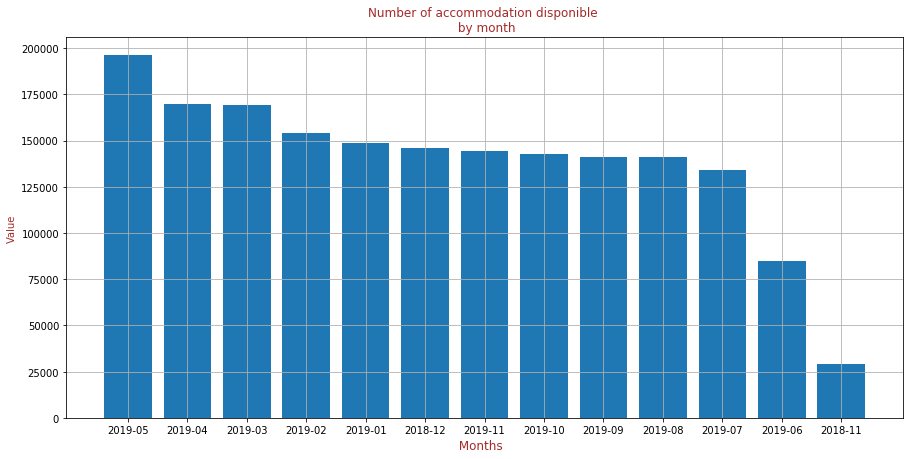

In [22]:
##counter by month
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(15,7))
# Grid lines, Xticks, Xlabel, Ylabel

axis.set_xlabel(' Months   ',fontsize=12, color='brown')
axis.set_ylabel('Value',fontsize=10, color='brown')

X = months
Y = tag_counts

plt.title('Number of accommodation disponible \n by month', color='brown')
axis.bar(X,Y)
axis.grid(True)
plt.show()


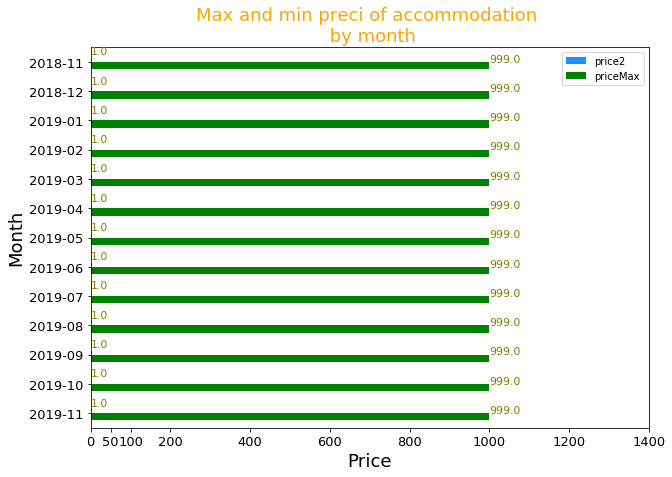

In [23]:
##MIN PRICE BY MONTH
ax = ratings_count_min[['price2', 'priceMax']].plot(kind='barh',
              figsize=(10,7), color=['dodgerblue', 'green'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Max and min preci of accommodation \n by month",fontsize=18, color='orange')
ax.set_xlabel("Price", fontsize=18)
ax.set_ylabel("Month", fontsize=18)
ax.set_xticks([0,50,100,200, 400, 600, 800, 1000,1200,1400])
ax.set_yticklabels(ratings_count_min['yearMonth'])

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    #ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),fontsize=13,color='green')
    ax.text(i.get_width(), i.get_y(), \
            str(round((i.get_width()), 2)), fontsize=11, color='olive')

# invert for largest on top 
ax.invert_yaxis()

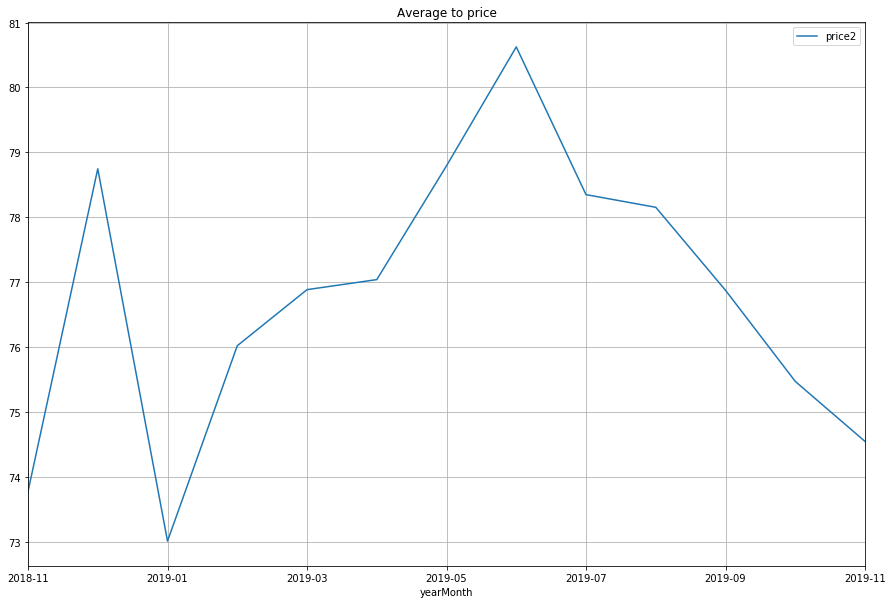

In [24]:
##koin calendar and neighbourhoods
ratings_count_avg = CalendarData[['yearMonth','price2']].groupby('yearMonth', as_index=False).mean()
ratings_count_avg.plot(x='yearMonth', y='price2', figsize=(15,10), grid=True, title='Average to price')

In [25]:
#ratings_count_avg

In [26]:
#listing.set_index('id')

In [27]:
#CalendarData.set_index('listing_id')

In [28]:
joined=listing.merge(barrios, on=['neighbourhood'], how='inner')
joined.head(2)

,id,name,host_id,host_name,neighbourhood_group_x,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_y
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141,Mitte
1,22677,Prenzel garden with leafy terrace,87357,Ramfis,Mitte,Brunnenstr. Süd,52.534348,13.405577,Entire home/apt,160,3,223,2018-11-05,2.27,1,228,Mitte


In [29]:
#barrios['neighbourhood'].dtypes

<Figure size 1080x720 with 0 Axes>

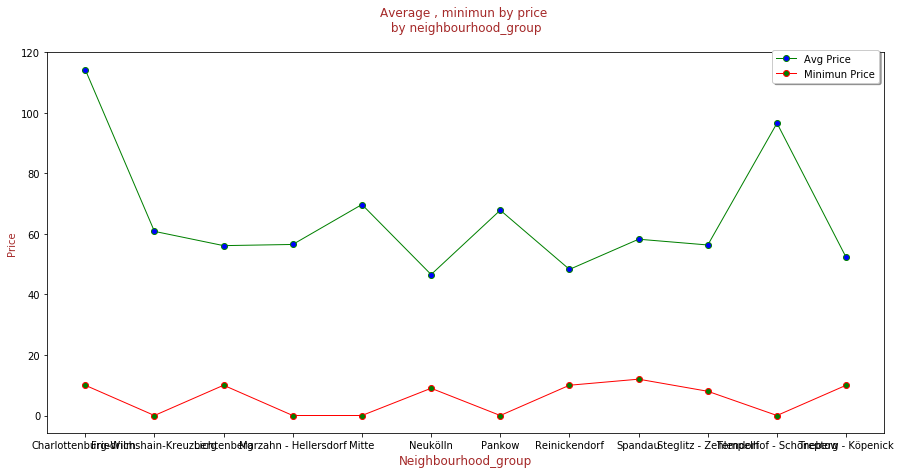

In [30]:
plt.figure(figsize=(15,10))

fig, ax = plt.subplots(figsize=(15,7))
plt.title('Average , minimun by price \n by neighbourhood_group \n', color='brown')
plt.xlabel('Neighbourhood_group',fontsize=12, color='brown')
plt.ylabel( 'Price',fontsize=10, color='brown')

##join calendar and neighbourhoods  title='Average to price \n by neighbourhood_group',
avergeCity = joined[['neighbourhood_group_y','price']].groupby('neighbourhood_group_y', as_index=False).mean()
plt.plot(avergeCity['neighbourhood_group_y'], avergeCity['price'],marker='.', markerfacecolor='blue', markersize=12, color='green', linewidth=1,label="Avg Price")
##min
avergeCitymin = joined[['neighbourhood_group_y','price']].groupby('neighbourhood_group_y', as_index=False).min()
plt.plot(avergeCitymin['neighbourhood_group_y'], avergeCitymin['price'], marker='.', markerfacecolor='green', markersize=12, color='red', linewidth=1,label="Minimun Price")

plt.legend(bbox_to_anchor=(1, 1.02),fancybox=True, shadow=True)

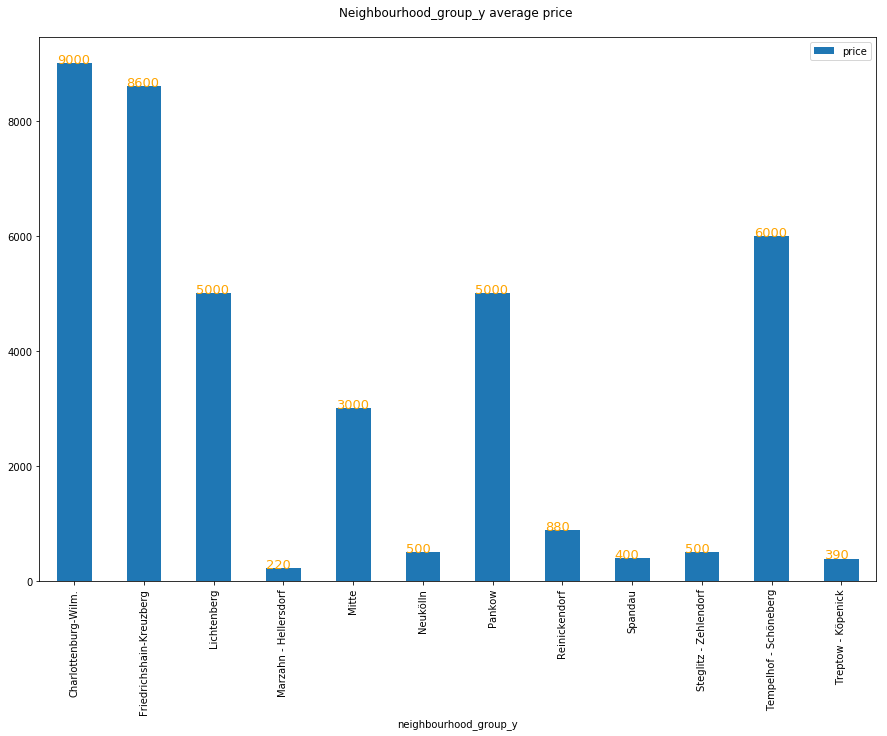

In [31]:
##Maximun price

avergeCitymax = joined[['neighbourhood_group_y','price']].groupby('neighbourhood_group_y', as_index=True).max()
ax=avergeCitymax.plot(kind='bar', figsize=(15,10), title='Neighbourhood_group_y average price \n')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),fontsize=13,color='orange')

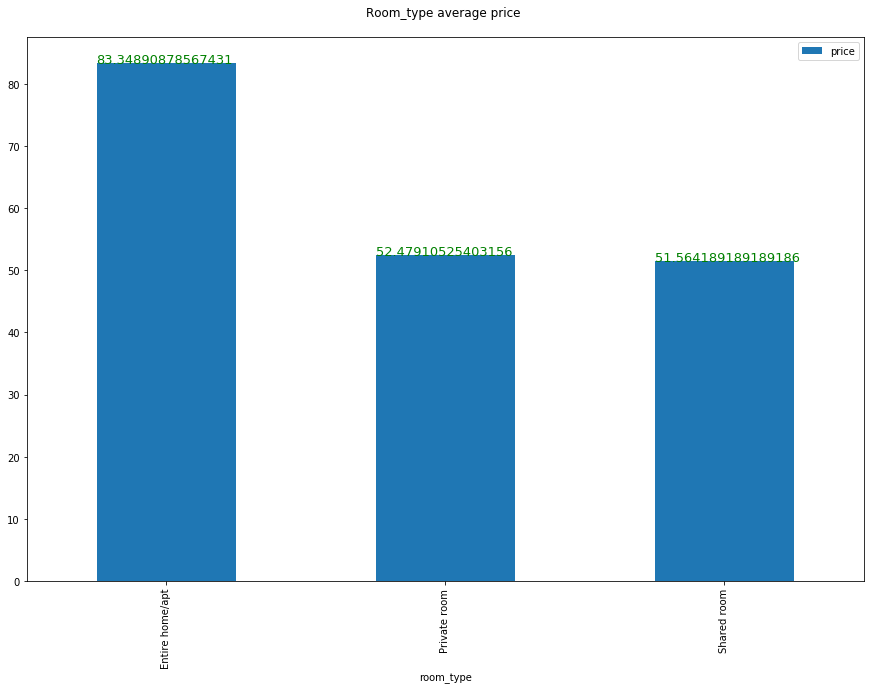

In [32]:

#avg price
avergeCitymax = joined[['room_type','price']].groupby('room_type', as_index=True).mean()
ax = avergeCitymax.plot(kind='bar', figsize=(15,10), title='Room_type average price \n')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height()),fontsize=13,color='green')

In [33]:
##imports lineal regresion
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [34]:
listing.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [35]:
#Specify the Prediction Target 
features = [ 'latitude', 'longitude',  
            'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']

In [36]:
target = ['price']

In [37]:
listing['id'].count()

22552

In [38]:
listing = listing.dropna()
listing['id'].count()

18587

In [39]:
x= listing[features]
x.head(2)

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,52.534537,13.402557,4,118,3.76,141
1,52.548513,13.404553,2,6,1.42,0


In [40]:
y = listing[target]
y.head(2)

,price
0,60
1,17


In [41]:
x.iloc[2]

latitude              52.534996
longitude             13.417579
minimum_nights        62.000000
number_of_reviews    143.000000
reviews_per_month      1.250000
availability_365     220.000000
Name: 2, dtype: float64

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=324)

In [43]:
###linael regresor
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[57.28341191],
       [61.71348486],
       [48.40437485],
       ...,
       [60.0380139 ],
       [50.97784821],
       [50.11923007]])

In [45]:
y_test.describe()

,price
count,6134.000000
mean,59.499022
std,80.326896
min,0.000000
25%,30.000000
50%,47.000000
75%,70.000000
max,5000.000000


In [46]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))
###std ->80.326896
print(RMSE)

80.06893531413805
